In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import data
data=pd.read_csv('D:/lh_data/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
X=data.iloc[:,3:13]   #dropping the first 3 columns
y=data.iloc[:,13]
print(X.shape, y.shape)

(10000, 10) (10000,)


In [5]:
data.groupby("Geography").Geography.count()

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
data.groupby("Gender").Geography.count()

Gender
Female    4543
Male      5457
Name: Geography, dtype: int64

In [7]:
# dummy1
#categorical_columns = ['Geography', 'Gender']
#for column in categorical_columns:
#    tempdf = pd.get_dummies(X[column], prefix=column)
#    X = pd.concat((X,tempdf), axis=1)
#    X = X.drop(columns=column)
#X.head()

In [8]:
# dummy2
geography=pd.get_dummies(X['Geography'],prefix='Geography_')
gender=pd.get_dummies(X['Gender'],prefix='Gender_',drop_first=True)

In [9]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography__France,Geography__Germany,Geography__Spain,Gender__Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)
print(X.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(10000, 12) (8000, 12) (8000,) (2000, 12) (2000,)


In [11]:
# scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
# import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

In [13]:
model_class=Sequential()
model_class.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu', input_dim=12))
model_class.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))
model_class.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))
model_class.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history=model_class.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6039 - accuracy: 0.7316 - val_loss: 0.5029 - val_accuracy: 0.7887
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4745 - accuracy: 0.8004 - val_loss: 0.4683 - val_accuracy: 0.7929
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4394 - accuracy: 0.8059 - val_loss: 0.4504 - val_accuracy: 0.7967
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.8046 - val_loss: 0.4416 - val_accuracy: 0.8027
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4140 - accuracy: 0.8193 - val_loss: 0.4346 - val_accuracy: 0.8084
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8240 - val_loss: 0.4286 - val_accuracy: 0.8107
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8190 - val_loss: 0.4231 - val_accuracy: 0.8152

In [14]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [15]:
print(model_class.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________
None


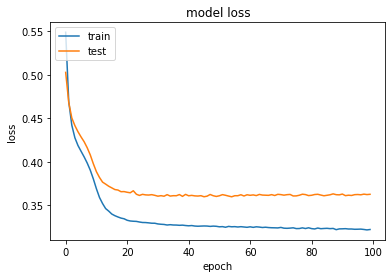

In [16]:
# history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

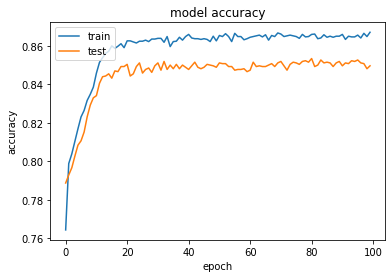

In [17]:
# history of loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [18]:
# predict
y_pred=model_class.predict(X_test)
y_pred

array([[0.24052274],
       [0.32996732],
       [0.17815802],
       ...,
       [0.2242913 ],
       [0.15327114],
       [0.23012108]], dtype=float32)

In [19]:
y_pred=y_pred>0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [20]:
print(y_test.shape, y_pred.shape)

(2000,) (2000, 1)


In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1496,   99],
       [ 188,  217]], dtype=int64)

In [22]:
# accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8565

## Tunning tool
### hyperparameters: HL,Neurons,LR

#!pip install keras-tuner

In [23]:
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch


In [24]:
def build_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int('num_layers',2,7)):
        model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),
                               kernel_initializer='he_uniform',
                               activation='relu'))
    model.add(layers.Dense(1,kernel_initializer='he_uniform', activation='sigmoid'))
    model.compile(keras.optimizers.Adam(hp.Choice('learning_rate',values=[0.01,0.001,0.0001])), 
                                        loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [25]:
tunning=RandomSearch(build_model, 
                    objective='val_accuracy',
                    max_trials=100,
                    executions_per_trial=3,
                    directory='my_directory',
                    project_name='ANN_001' )

In [26]:
tunning.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 7, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [27]:
print(X_train.shape, y_train.shape)

(8000, 12) (8000,)


In [28]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print(X_train2.shape, X_val.shape, y_train2.shape, y_val.shape)

(5600, 12) (2400, 12) (5600,) (2400,)


In [29]:
tunning.search(X_train2, y_train2, epochs=5, validation_data=(X_val,y_val))

Trial 100 Complete [00h 00m 10s]
val_accuracy: 0.85916668176651

Best val_accuracy So Far: 0.8666666547457377
Total elapsed time: 00h 19m 11s
INFO:tensorflow:Oracle triggered exit


In [30]:
tunning.results_summary()

Results summary
Results in my_directory\ANN_001
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 6
units_0: 480
units_1: 224
learning_rate: 0.001
units_2: 96
units_3: 256
units_4: 384
units_5: 32
Score: 0.8666666547457377
Trial summary
Hyperparameters:
num_layers: 6
units_0: 448
units_1: 288
learning_rate: 0.0001
units_2: 480
units_3: 192
units_4: 32
units_5: 256
units_6: 384
Score: 0.8648611108462015
Trial summary
Hyperparameters:
num_layers: 7
units_0: 512
units_1: 480
learning_rate: 0.001
units_2: 288
units_3: 480
units_4: 96
units_5: 96
units_6: 416
Score: 0.8648611108462015
Trial summary
Hyperparameters:
num_layers: 5
units_0: 192
units_1: 320
learning_rate: 0.001
units_2: 384
units_3: 320
units_4: 160
units_5: 192
units_6: 320
Score: 0.8647222320238749
Trial summary
Hyperparameters:
num_layers: 5
units_0: 480
units_1: 224
learning_rate: 0.001
units_2: 128
units_3: 128
units_4: 128
units_5: 96
units_6: 224
Score: 0.8

In [37]:
model_class=Sequential()
model_class.add(Dense(units=480,kernel_initializer='he_uniform', activation='relu', input_dim=12))
model_class.add(Dense(units=224,kernel_initializer='he_uniform', activation='relu'))
model_class.add(Dense(units=96,kernel_initializer='he_uniform', activation='relu'))
model_class.add(Dense(units=256,kernel_initializer='he_uniform', activation='relu'))
model_class.add(Dense(units=384,kernel_initializer='he_uniform', activation='relu'))
model_class.add(Dense(units=32,kernel_initializer='he_uniform', activation='relu'))
model_class.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))
model_class.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history=model_class.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4761 - accuracy: 0.8029 - val_loss: 0.4120 - val_accuracy: 0.8154
Epoch 2/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3695 - accuracy: 0.8532 - val_loss: 0.3862 - val_accuracy: 0.8358
Epoch 3/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3426 - accuracy: 0.8567 - val_loss: 0.3875 - val_accuracy: 0.8383
Epoch 4/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8614 - val_loss: 0.3811 - val_accuracy: 0.8487
Epoch 5/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3223 - accuracy: 0.8649 - val_loss: 0.3911 - val_accuracy: 0.8454
Epoch 6/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3327 - accuracy: 0.8617 - val_loss: 0.3852 - val_accuracy: 0.8433
Epoch 7/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.8637 - val_loss: 0.4152 - val_accuracy: 0.8450

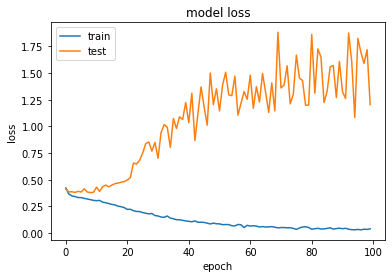

In [38]:
# history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [39]:
# predict
y_pred=model_class.predict(X_test)
y_pred
y_pred=y_pred>0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [40]:
y_pred = np.squeeze(y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


Predicted,False,True,All
Actual,,,
0,1415,180,1595
1,191,214,405
All,1606,394,2000


In [41]:
score=accuracy_score(y_pred,y_test)
score

0.8145

## Tunning tool2

In [97]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization
from keras.activations import relu, sigmoid

In [124]:
def build_model2(layers,activation):
    model=Sequential()
    for i , nodes in enumerate(layers):
        
        if i==0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.2))
            #print(i,nodes,activation)
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.2))
            #print(i,nodes,activation)
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    return model


In [125]:
model2 = KerasClassifier(build_fn=build_model2, verbose=0)

In [129]:
layers=[(15,),(30,15),(45,30,15)]
activations=['sigmoid','relu']
param_grid=dict(layers=layers, activation=activations, batch_size=[32,64,128,256], epochs=[50,100])
param_grid

{'layers': [(15,), (30, 15), (45, 30, 15)],
 'activation': ['sigmoid', 'relu'],
 'batch_size': [32, 64, 128, 256],
 'epochs': [50, 100]}

In [130]:
grid=GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, verbose=3)

In [131]:
grid_result=grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(15,); total time=   6.6s
[CV 2/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(15,); total time=   6.8s
[CV 3/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(15,); total time=   6.7s
[CV 4/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(15,); total time=   6.8s
[CV 5/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(15,); total time=   7.6s
[CV 1/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(30, 15); total time=   7.4s
[CV 2/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(30, 15); total time=   7.4s
[CV 3/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(30, 15); total time=   7.5s
[CV 4/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(30, 15); total time=   7.4s
[CV 5/5] END activation=sigmoid, batch_size=32, epochs=50, layers=(30, 15); total time=   7.4s
[CV

In [133]:
print('best_score:',grid_result.best_score_)
print('best_parameters:',grid_result.best_params_)

best_score: 0.862500011920929
best_parameters: {'activation': 'relu', 'batch_size': 64, 'epochs': 50, 'layers': (45, 30, 15)}


In [143]:
y_pred=(grid.predict(X_test)>0.5).astype("int32")
y_pred = np.squeeze(y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)


C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted,0,1,All
Actual,,,
0,1513,82,1595
1,204,201,405
All,1717,283,2000


In [144]:
score=accuracy_score(y_pred,y_test)
score

0.857

In [146]:
model_class2=Sequential()
model_class2.add(Dense(units=45,kernel_initializer='he_uniform', activation='relu', input_dim=X_train.shape[1]))
model_class2.add(Dense(units=30,kernel_initializer='he_uniform', activation='relu'))
model_class2.add(Dense(units=15,kernel_initializer='he_uniform', activation='relu'))
model_class2.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))
model_class2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history=model_class2.fit(X_train, y_train, validation_split=0.3, batch_size=64, epochs=50)

Epoch 1/50
88/88 [==============================] - 1s 5ms/step - loss: 0.5293 - accuracy: 0.7534 - val_loss: 0.4558 - val_accuracy: 0.7987
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8179 - val_loss: 0.4383 - val_accuracy: 0.8042
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8183 - val_loss: 0.4216 - val_accuracy: 0.8142
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8367 - val_loss: 0.4109 - val_accuracy: 0.8229
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8491 - val_loss: 0.4018 - val_accuracy: 0.8292
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8530 - val_loss: 0.3886 - val_accuracy: 0.8354
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8674 - val_loss: 0.3838 - val_accuracy: 0.8408
Epoch 8/50
88/88 [==

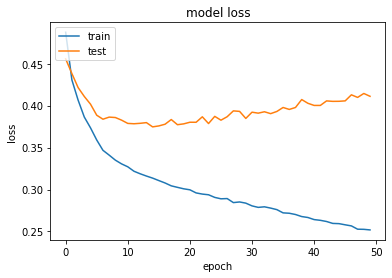

In [147]:
# history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()